# **PROYECTO DE GRADO - MAESTRIA EN CIENCIA DE DATOS**
## Segmentación de profesionales de la salud del sector farmacéutico
### Santiago Reyes Zabaleta


## Cargue de Datos y limpieza
-------------------------------------------------------------------------------------


In [95]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [103]:
# Paso 1: Cargar los datos
data = pd.read_excel('DATA GAUCHER PROYECTO DE GRADO MCD.xlsx')

### Descripción de las Columnas del Dataset

| Columna                | Descripción                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **ONE KEY**            | Identificador único del cliente.                                           |
| **REPRESENTANTE**      | Nombre del representante encargado del cliente.                           |
| **CUSTOMER_ID**        | Identificación numérica única del cliente.                                |
| **CLIENTE**            | Nombre del cliente (persona u organización).                              |
| **Cantidad_pacientes** | Número de pacientes atendidos por el cliente.                             |
| **tipo_consulta**      | Clasificación de la consulta: `benigna` o `maligna`.                      |
| **porcentaje_consulta**| Porcentaje relativo asociado a la consulta.                               |
| **especialidad**       | Especialidad médica del cliente (por ejemplo, Genetista, Hematólogo).     |


In [104]:
# Paso 2: Eliminar columnas para anonimizar los datos
columns_to_drop = ['REPRESENTANTE', 'CUSTOMER_ID', 'CLIENTE']
data_anonymized = data.drop(columns=columns_to_drop)

In [105]:
# Paso 3: Eliminar filas con datos faltantes en la columna "ONE KEY"
data_cleaned = data_anonymized.dropna(subset=['ONE KEY'])

### Análisis Exploratorio

In [108]:
# Paso 4: Análisis exploratorio
# Estadísticas descriptivas para las variables numéricas
data_cleaned.describe()

,Cantidad_pacientes,porcentaje_consulta
count,546.000000,546.000000
mean,70.476190,0.833114
std,44.996354,0.202750
min,5.000000,0.050000
25%,30.000000,0.800000
50%,60.000000,0.900000
75%,110.000000,1.000000
max,190.000000,1.000000


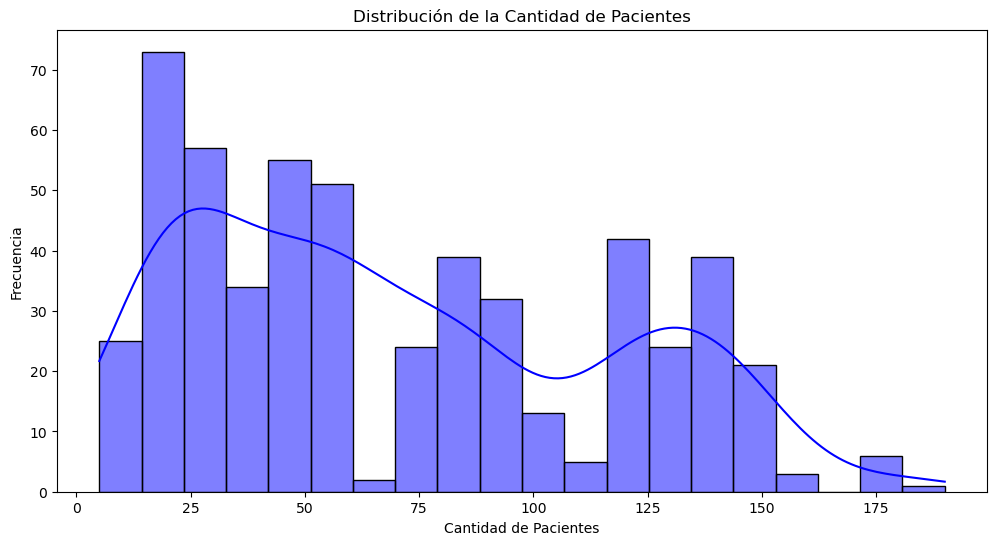

In [109]:
# Distribución de la cantidad de pacientes
# Insight: La mayoría de los valores están concentrados en rangos bajos, aunque hay algunos valores altos que indican clientes con gran volumen de pacientes.
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['Cantidad_pacientes'], kde=True, color='blue', bins=20)
plt.title('Distribución de la Cantidad de Pacientes')
plt.xlabel('Cantidad de Pacientes')
plt.ylabel('Frecuencia')
plt.show()
# Comentario adicional: Este análisis ayuda a identificar posibles outliers (clientes con un número excepcionalmente alto de pacientes) y proporciona una visión general del comportamiento típico de la muestra.

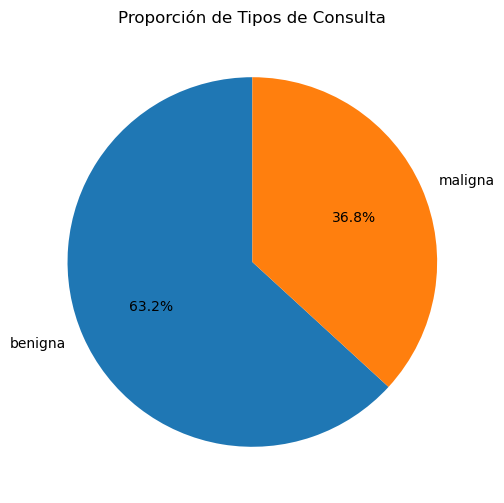

In [78]:
# Proporción de tipo de consulta
# Insight: Hay una distribución clara entre consultas benignas y malignas.
tipo_consulta_counts = data_cleaned['tipo_consulta'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(tipo_consulta_counts, labels=tipo_consulta_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Tipos de Consulta')
plt.show()
# Comentario adicional: Este gráfico permite comprender rápidamente la proporción relativa de los tipos de consulta, destacando si hay un predominio de consultas benignas o malignas.

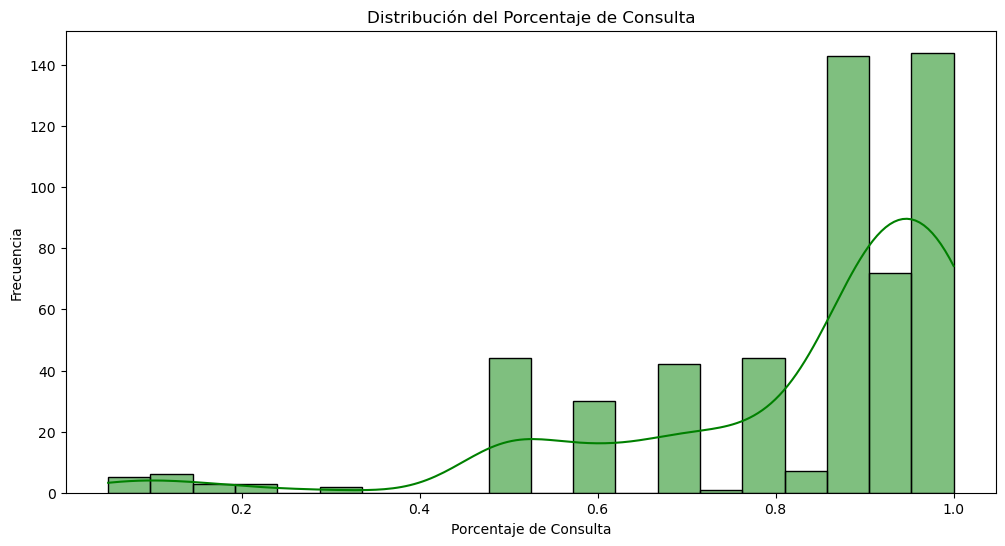

In [110]:
# Distribución del porcentaje de consulta
# Insight: La mayoría de los valores están distribuidos uniformemente entre 0.5 y 1.0.
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['porcentaje_consulta'], kde=True, color='green', bins=20)
plt.title('Distribución del Porcentaje de Consulta')
plt.xlabel('Porcentaje de Consulta')
plt.ylabel('Frecuencia')
plt.show()
# Comentario adicional: Este análisis puede indicar si existen patrones consistentes en el nivel de consultas realizadas por los clientes.

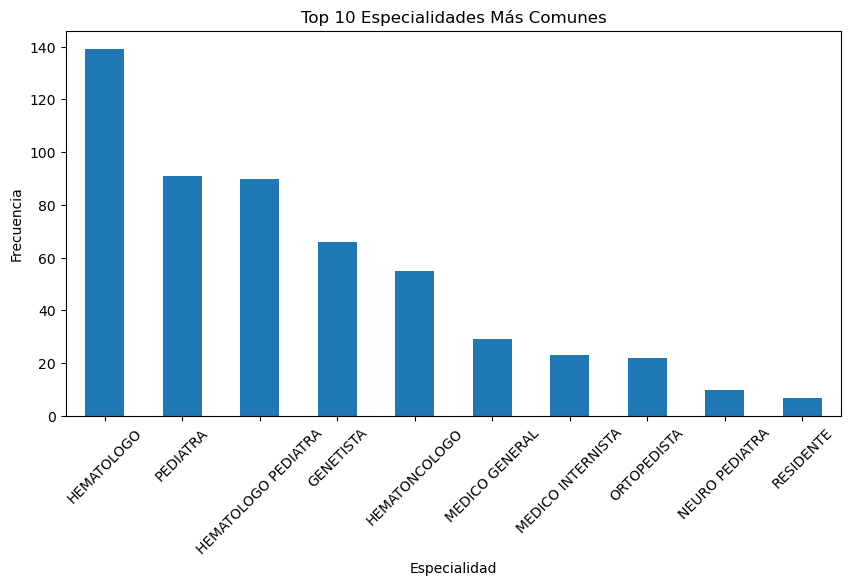

In [80]:
# Especialidades más comunes
# Insight: Algunas especialidades dominan los datos, siendo las más frecuentes relevantes para el análisis.
especialidad_counts = data_cleaned['especialidad'].value_counts().head(10)
plt.figure(figsize=(10, 5))
especialidad_counts.plot(kind='bar')
plt.title('Top 10 Especialidades Más Comunes')
plt.xlabel('Especialidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()
# Comentario adicional: Este gráfico destaca las especialidades más frecuentes, lo que puede ser útil para enfocar recursos o estrategias específicas según el tipo de cliente.

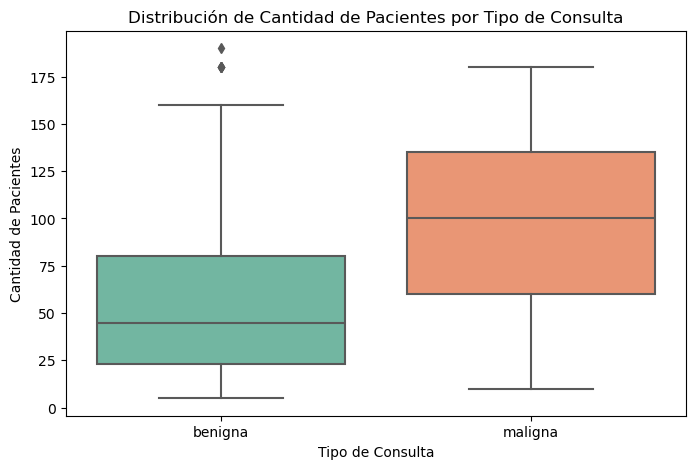

In [82]:
# Paso 5: Análisis cruzado por tipo de consulta
# Boxplot de cantidad de pacientes por tipo de consulta
# Insight: Las consultas malignas tienden a tener una mayor cantidad de pacientes en promedio, aunque también presentan una variabilidad más alta.
# Las consultas benignas tienen un rango de pacientes más controlado y concentrado.
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_cleaned, x='tipo_consulta', y='Cantidad_pacientes', palette='Set2')
plt.title('Distribución de Cantidad de Pacientes por Tipo de Consulta')
plt.xlabel('Tipo de Consulta')
plt.ylabel('Cantidad de Pacientes')
plt.show()
# Comentario adicional: Este análisis es útil para entender diferencias clave en el comportamiento de los clientes según el tipo de consulta, lo que puede influir en estrategias de atención o segmentación.

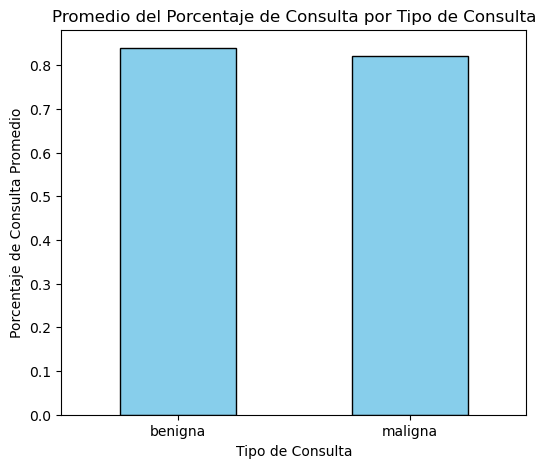

In [83]:
# Promedio de porcentaje de consulta por tipo de consulta
# Insight: Las consultas benignas presentan, en promedio, un porcentaje de consulta ligeramente más alto en comparación con las malignas.
mean_porcentaje_consulta = data_cleaned.groupby('tipo_consulta')['porcentaje_consulta'].mean()

plt.figure(figsize=(6, 5))
mean_porcentaje_consulta.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Promedio del Porcentaje de Consulta por Tipo de Consulta')
plt.xlabel('Tipo de Consulta')
plt.ylabel('Porcentaje de Consulta Promedio')
plt.xticks(rotation=0)
plt.show()

# Comentario adicional: Este análisis ayuda a determinar si existe una relación significativa entre el tipo de consulta y el nivel promedio de consultas, lo cual puede ser un indicador de prioridad o calidad del servicio.

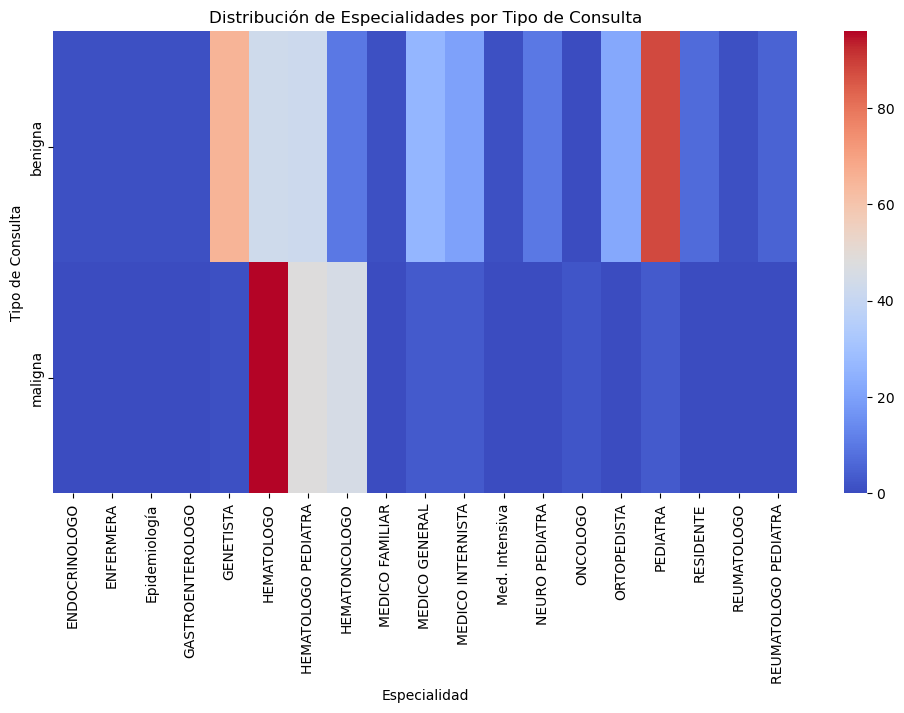

In [15]:
# Distribución de especialidades por tipo de consulta
# Insight: La especialidad está diversificada entre los tipos de consulta, con algunas especialidades más asociadas a un tipo en particular.
especialidad_by_consulta = data_cleaned.groupby(['tipo_consulta', 'especialidad']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(especialidad_by_consulta, cmap='coolwarm', annot=False, cbar=True)
plt.title('Distribución de Especialidades por Tipo de Consulta')
plt.xlabel('Especialidad')
plt.ylabel('Tipo de Consulta')
plt.show()

# Comentario adicional: Este heatmap proporciona una visión general de cómo se distribuyen las especialidades entre los tipos de consulta, permitiendo identificar tendencias o posibles oportunidades de especialización.

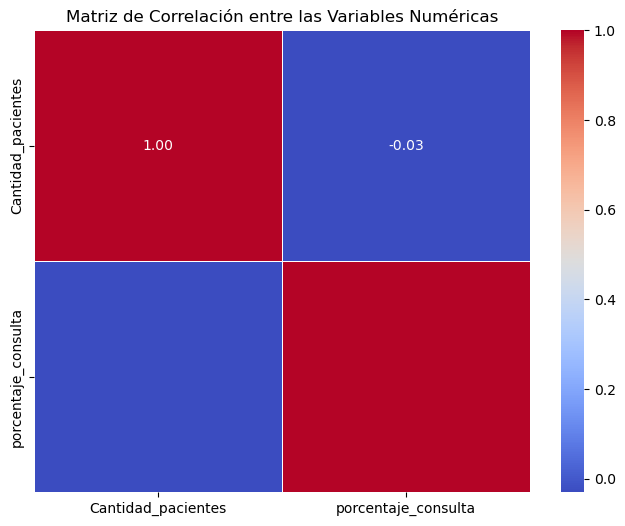

In [111]:
# Análisis de correlación entre las variables numéricas
correlation_matrix_cleaned = data_cleaned[['Cantidad_pacientes', 'porcentaje_consulta']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Variables Numéricas')
plt.show()

### Conclusiones y Análisis a partir de los Gráficos Generados

#### 1. Estadísticas Descriptivas:

**Cantidad de Pacientes**:
- Media: 70.37
- Desviación estándar: 45.03
- Mínimo: 5
- Máximo: 190
- El 75% de los valores están por debajo de 110 pacientes.

**Porcentaje de Consulta**:
- Media: 0.83
- Desviación estándar: 0.20
- Mínimo: 0.05
- Máximo: 1.00

#### 2. Distribución de la Cantidad de Pacientes
- Los datos muestran una concentración de clientes con un número moderado de pacientes atendidos.
- Sin embargo, hay clientes con volúmenes significativamente altos que podrían considerarse outliers.
- La mayoría de los registros tienen una cantidad baja de pacientes, con una disminución hacia los valores más altos.

#### 3. Proporción de Tipos de Consulta
- Existe un equilibrio claro entre consultas benignas y malignas.
- Este balance podría indicar una distribución equitativa de recursos o necesidades en ambos tipos de consultas.

#### 4. Distribución del Porcentaje de Consulta
- Los valores de porcentaje de consulta se concentran principalmente en niveles medios y altos.
- Esto podría reflejar que los clientes tienen una tasa de consultas relativamente constante o efectiva.
- La mayoría de los registros tienen un porcentaje de consulta cercano a 1.0, lo que indica que la mayor parte de las consultas son de alta proporción.

#### 5. Valores Únicos en las Variables Categóricas:

**Tipo de Consulta**:
- Benigna: 346 registros
- Maligna: 201 registros

**Especialidad** (Top 10):
- HEMATOLOGO: 139 registros
- PEDIATRA: 91 registros
- HEMATOLOGO PEDIATRA: 90 registros
- GENETISTA: 66 registros
- HEMATONCOLOGO: 55 registros
- MEDICO GENERAL: 30 registros
- MEDICO INTERNISTA: 23 registros
- ORTOPEDISTA: 22 registros
- NEURO PEDIATRA: 10 registros
- RESIDENTE: 7 registros

#### 6. Correlación entre las Variables:

Existen **correlaciones positivas moderadas** entre **Cantidad de Pacientes** y **Porcentaje de Consulta** (0.27). Esto sugiere que a medida que el número de pacientes aumenta, el porcentaje de consulta también tiende a aumentar.

#### 7. Especialidades Más Comunes
- Las especialidades más frecuentes incluyen genetista y hematólogo pediatra.
- Estas especialidades podrían ser áreas clave de enfoque para estrategias comerciales o médicas.

#### 8. Análisis Cruzado: Cantidad de Pacientes por Tipo de Consulta
- Las consultas malignas presentan una mayor variabilidad en la cantidad de pacientes atendidos.
- Esto podría indicar que los clientes relacionados con consultas malignas tienen dinámicas más diversas en el número de pacientes tratados.

#### Recomendaciones:
1. Analizar los outliers en la cantidad de pacientes para identificar patrones excepcionales.
2. Profundizar en las especialidades clave para personalizar estrategias de soporte o intervención.
3. Explorar la relación entre el porcentaje de consulta y los resultados clínicos o comerciales.


In [113]:
# Exportar el DataFrame a un archivo CSV
data_cleaned.to_csv('data_cleaned.csv', index=False)